# Fragmentation rate

The fragmentation rate $k_\text{frag}$ is arguably the most important model parameter, describing the rate at which the mass of polymer in each size class fragments. It has units of s<sup>-1</sup> and thus, for a given period of time $t + \Delta t$, a mass $m = \Delta t k_\text{frag,i,t}$ of polymer fragments from size class $i$. The [](./fragment-size-distribution.md) controls how this mass is split amongst daughter size classes.

Fragmentation is size class and time dependent, and thus internally is a 2D array of dimensions `(n_timesteps, n_size_classes)`. The size class dependence is controlled by [input parameter `theta_1`](input-data:theta_1) ($\theta_1$) and the time dependence by [`k_frag_tau`](input-data:k_frag_tau) ($\tau$):

$$
    k_{\text{frag},i,t} = k_\text{frag,av} \cdot \frac{d_i^{2 \theta_1} \cdot t^\tau}{d_\text{median}^{2 \theta_1} \cdot t_\text{median}^\tau}
$$

where $k_\text{frag,av}$ is the scalar input parameter `k_frag` (note a size-dependent distribution can also be input), $d$ is the size class diameter and $t$ is the timestep index (which is 1-indexed). The median diameter and timestep index are used such that $k_\text{frag,av}$ represents the (unweighted) average fragmentation rate across size and time.

We can test what this dependence looks like in practice by using the model to calculate this fragmentation rate array:

In [1]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data

# Set an arbitrary average fragmentation rate, theta_1 and tau
minimal_data['k_frag'] = 0.1
minimal_data['theta_1'] = -0.001
minimal_data['k_frag_tau'] = -0.001

# Create a new model instance used these
fmnp = FragmentMNP(minimal_config, minimal_data)
fmnp.k_frag.shape

(100, 7)

The `minimal_config` sets `n_timesteps` to 100 and `n_size_classes` to 7, and hence the shape of the `k_frag` array is (100, 7). Let's plot this dependence:

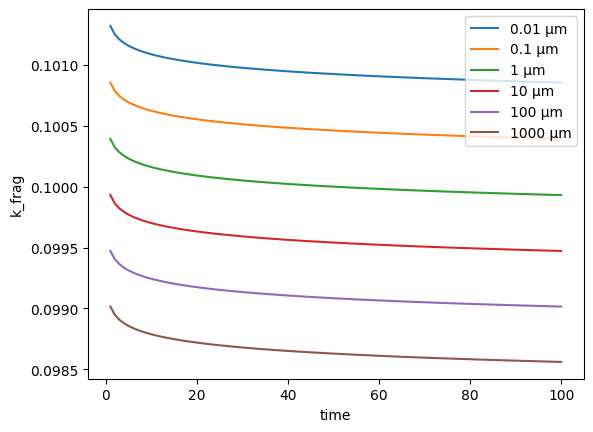

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_k_frag(fmnp):
    # Plot the time evolution of the fragmentation rate for
    # each size class. We exclude the smallest size class as
    # this always has k_frag=0
    plt.plot(np.arange(1, fmnp.n_timesteps + 1), fmnp.k_frag[:,1:])
    plt.legend([f'{c * 1e6:<1g} µm' for c in fmnp.psd[1:]])
    plt.xlabel('time')
    plt.ylabel('k_frag')

plot_k_frag(fmnp)

As you can see, setting a negative `theta_1` and `k_frag_tau` means that the fragmentation rate decreases with increasing time and particle diameter. Now if we update `theta_1` and `k_frag_tau` to be positive, we will see the inverse depedence. We also change the values to show a strong time dependence but weaker size dependence:

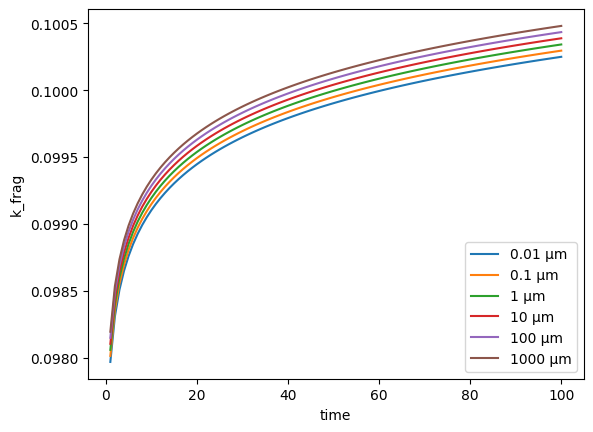

In [6]:
minimal_data['theta_1'] = 0.0001
minimal_data['k_frag_tau'] = 0.005
fmnp = FragmentMNP(minimal_config, minimal_data)
plot_k_frag(fmnp)

## Setting your own $k_\text{frag}$ array

If the time and size dependencies that can be achieved using $\theta_1$ and $\tau$ are not suitable for your application, you can of course set your own $k_\text{frag}$ array by modifying the `k_frag` attribute directly after initialising the model:

In [9]:
fmnp.k_frag = np.random.rand(fmnp.n_timesteps, fmnp.n_size_classes)